# Cwiczenie 3 z Uczenia Maszynowego - Zadanie 3 (algorytm k-średnich w wersji Forgy-Janceya); Kazimierz Ławida, 233218.

# I. Analiza zadania:

1. Opis problemu: Zadanie polega na zaimplementowaniu algorytmu grupowania k-średnich z członem jądrowym znanym jako metoda Forgy-Janceya. Parametrem metody będzie rozmiar kroku α.
2. Opis algorytmu k-średnich: Algorytm K-średnich to model uczenia nienadzorowanego grupujący dane. W algorytmie tym dokonujemy optymalizacji położenia elementów w grupach względem ich środków ciężkości (k grup a środek ciężkości jest reprezentowany przez średnią - stąd k-średnich). 
3. Przebieg metody k-średnich:
    - wyznaczenie początkowego podziału, przyjęcie liczby grup oraz maksymalnej ilośći iteracji;
    - wyznaczenie położenia środka ciężkości w każdej grupie czyli dokonanie zamian w celu minimalizacji;
    - poprawianie środków ciężkości;
    - zakończenie, jeśli każdy element jest przypisany do grupy;
4. Opis metody Forgy-Janceya: W przeciwieństwie do zwykłej metody k-średnich stosujemy jądra w miejsce środków ciężkości, a także ich koretka następuje po przejrzeniu wszystkich zmiennych.

Zaimportowanie odpowiednich blibliotek:

In [1]:
import math as math
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# II. Zbudowanie algorytmu k-means z metodą Forgy-Janceya:
Modyfikacje względem "zwykłych" k-średnich opisane w komentarzach


In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    #inicjalizacja środków ciężkości i jąder
    def fit(self,data):

        self.centroids = {}
        self.kernels = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            self.kernels[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}
            original_centroid = []
            current_centroid = []
            prev_kernels = dict(self.kernels)
            
            #poprawa środków ciężkości i wyznaczanie położenia jądra oraz "podmiana" aktualnego środka na jądro
            for c in self.centroids:
                original_centroid = prev_kernels[c]
                current_centroid = self.centroids[c]
                current_kernel = original_centroid + alfa*(current_centroid - original_centroid)
                current_centroid = current_kernel

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = self.calculate_distances(featureset)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)


            optimized = True

            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                optimized = False

            if optimized:
                break
        for classification in self.classifications:
            self.centroids[classification] = np.average(self.classifications[classification],axis=0)

    def calculate_distances(self, featureset):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        return distances

    def predict(self,data):
        distances = self.calculate_distances(data)
        classification = distances.index(min(distances))
        return classification

sprawdzamy działanie algorytmu:

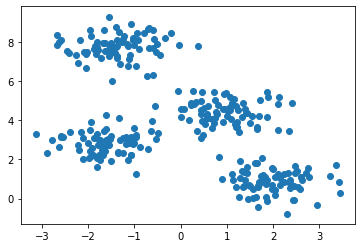

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

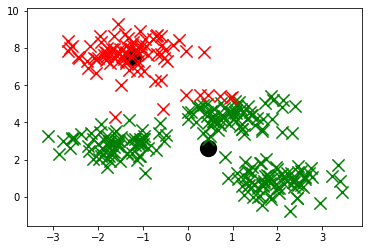

In [6]:
alfa = 1
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

Robimy predykcje dla nowych danych

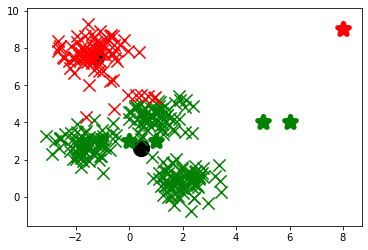

In [5]:
clf = K_Means()
clf.fit(X)
colors = 10*["g","r","c","b","k"]
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# III. Porównanie zbudowanego algorytmu z wbudowanym w pakiet sklearn algorytmem KMeans.

Ładujemy nowe dane:

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
X.size

600

Tworzymy model KMeans:

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

km.fit(X)
y_hat = km.predict(X)

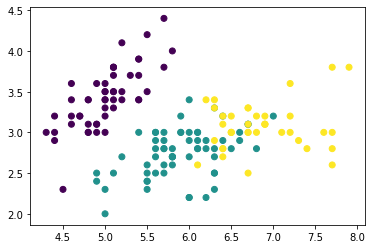

In [9]:
%matplotlib inline

x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

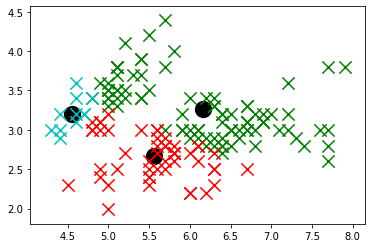

In [10]:
alfa = 1
model = K_Means(k=3)
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

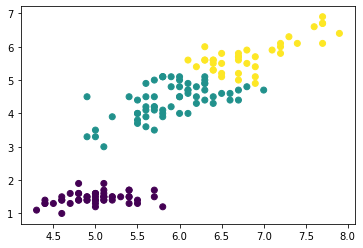

In [11]:
%matplotlib inline

x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

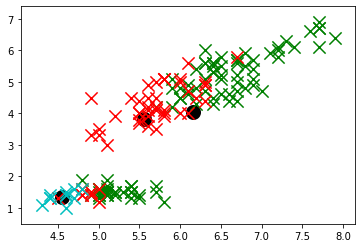

In [12]:
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][2],
                marker="o", color="k", s=100, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[2], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

# IV. Podsumowanie:
- Działanie zbudowanego algorytmu odbiega od zaimplementowanego w scikit-learn KMeans.